# hw1: getting started with Gaussian Processes in python 


###Problem 1 of 3 (40 points).  Get your computing infrastructure set up.

- Options:
     1. python+GPy+GitHub: 
          1. See [these instructions](getting_started.ipynb)
          2. Fork this repository to get this notebook
          3. Make sure you can run the commands already in this notebook
     2. matlab: 
          1. Choose [gpml](http://www.gaussianprocess.org/gpml/code/matlab/doc/) or [gpstuff](http://becs.aalto.fi/en/research/bayes/gpstuff/).  I recommend gpml, but really only slightly.
          2. Look at the html version of this and future notebooks.
     3. R: 
          1. Apparently [gpstuff](http://becs.aalto.fi/en/research/bayes/gpstuff/) can be used in R, but I can not speak to that.
          2. Look at the html version of this and future notebooks.
      
      
 - Help me choose:
     1. You should choose the python+GitHub option:
         - PRO: 
             - once you understand and get through the first step, the rest of this homework will be extremely easy
             - you will learn a modern computing infrastructure, which you should want to do
             - the rest of the course will be much easier to implement
             - knowing these things will increase your employability and usefulness as a statistician, data scientist, computer scientist,...
             - you will need to invest a few hours up front, but you will recoup it many times over by the end of the semester
         - CON: 
             - python and git may be new to you.  They can be confusing, and some effort is required.
     2. The only reasons to choose a different option:
         - New technologies can be uncomfortable and scary.  
         - You already know that you will never need to do anything but R or Matlab for the rest of your life.  How sad.
        

###Problem 2 of 3 (40 points).  Run a simple GP regression on toy data.
 Notes: this is a modification of this [GPy tutorial](http://nbviewer.ipython.org/github/SheffieldML/notebook/blob/master/GPy/basic_gp.ipynb).  All you are expected to do is to run the commands below.  You should tweak them in small ways to demonstrate your understanding (small changes to the toy data, figure colors, or something like that).  Note that, if you chose the python+git option, this should take about 5 minutes; otherwise this should take a few hours.


 - Import relevant libraries (it's good practice to do this in a block at the top of the code)

In [31]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import GPy as gpy
from IPython.display import display

 - Format figures.

In [35]:
# (python does not typically show plots until you ask it, so this inline call gives more 'natural' behavior)
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (8,5)

 - Generate and plot simple toy data for regression.

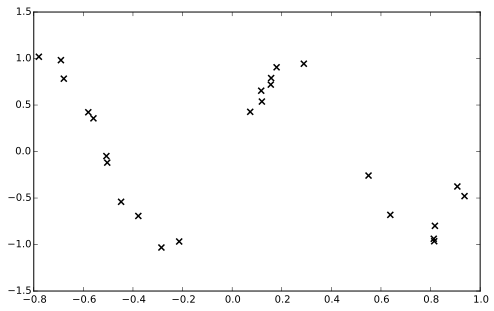

In [48]:
num_points = 25
t = np.random.uniform(-1.,1.,(num_points,1))
x = np.sin(t*2*np.pi) + 0.1*np.random.randn(num_points,1)
plt.plot(t,x,'kx',markersize=6,markeredgewidth=1.5)

  - Instantiate a kernel for your GP (you should know what each of these arguments means).

In [56]:
kernel = gpy.kern.RBF(input_dim=1, variance=1., lengthscale=.1)

 - Do GP regression with your noisy data, and display the model.

In [57]:
m = gpy.models.GPRegression(t,x,kernel)
display(m)

 - Plot this temporary result and notice that the hyperparameters (variance, lengthscale) describe the data poorly.  Note the log-likelihood above.

{'dataplot': [<matplotlib.lines.Line2D at 0x10ab47b90>],
 'gpplot': [[<matplotlib.lines.Line2D at 0x10ab3a750>],
  [<matplotlib.lines.Line2D at 0x10ab47550>]]}

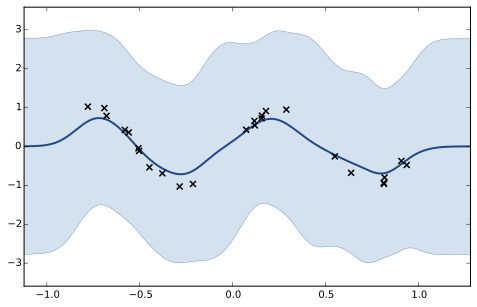

In [58]:
m.plot()

 - Perform **model selection** in the sense of maximizing the log-likelihood of the data over the hyperparameters.  Because this problem is non-convex, we use multiple random restarts and choose the best. (note: GPy tends to be heavy on warnings, and if I run the optimization a few times, these typically go away).

In [44]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 2.4758480353
Optimization restart 2/10, f = 27.1293364959
Optimization restart 3/10, f = 2.47584803533
Optimization restart 4/10, f = 2.4758480353
Optimization restart 5/10, f = 2.4758480353
Optimization restart 6/10, f = 2.4758480353
Optimization restart 7/10, f = 27.1293364959
Optimization restart 8/10, f = 27.1293364959
Optimization restart 9/10, f = 27.1293364959
Optimization restart 10/10, f = 2.47584803531


 - Display and plot the optimized GP model, and note how much better it looks.  Note the difference in log-likelihood compared to previous.  You may also want to try ```m.plot?``` (then enter) and ```gpy.kern.``` (followed by tab) to see more options. 

In [45]:
display(m)

{'dataplot': [<matplotlib.lines.Line2D at 0x10a4b1190>],
 'gpplot': [[<matplotlib.lines.Line2D at 0x10a495d10>],
  [<matplotlib.lines.Line2D at 0x10a4a4b10>]]}

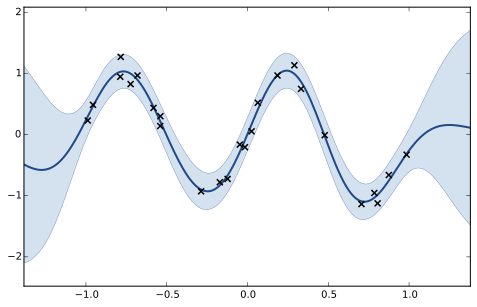

In [46]:
m.plot()

###Problem 3 of 3 (20 points).  Submit your homework in an allowable format.

1. If you chose the python+git option, again this should take about 5 minutes:
    A. You tweaked the commands in the above notebook in small ways to demonstrate you understand its workings.
    B. Just run the notebook and save it.
    C. Submit the notebook (ipynb format) to [courseworks](courseworks.columbia.edu)
    
2. If you chose a different option, this should take a while:
    A. You ported the commands above to your platform of choice.  
    B. Write latex that includes what you did, along with your output tables and figures.  
    C. Submit a pdf of that file to [courseworks](courseworks.columbia.edu).
         
3. If you do not adhere to one of these above two options, you will get a 0 for the assignment.